In [ ]:
import os
import pandas as pd
import numpy as np
import xarray as xr
import matplotlib as mpl
mpl.rc("figure", figsize=(10, 10))
mpl.rcParams.update({'font.size': 10})
import matplotlib.pyplot as plt
os.environ["PROJ_LIB"] = "C:\\Utilities\\Python\\Anaconda\\Library\\share"
from mpl_toolkits.basemap import Basemap
from src.plotting_functions import pcolormesh_basemapplot_cube
from src.plotting_functions import pcolormesh_basemapplot_data
from src.plotting_functions import pcolormesh_df
from src.plotting_functions import plot_locations_df
from src.plotting_functions import histogram_plot
from src.plotting_functions import bernoulli_gamma_pdf_plot
from src.plotting_functions import plot_observations_df
from src.plotting_functions import lima_alpha_beta_relationship_scatter

base_path = '/data/notebooks/jupyterlab-biascorrlab/data/Lima2021/'
folder = 'Randomly_Distributed_Observations_100/'

2022-05-26 12:41:00.855109: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory


In [ ]:
samples_ds = xr.open_dataset(f'{base_path}{folder}AP_BGGPLima_Snowfall_044_Sample.nc')

In [ ]:
samples_ds['alpha']=np.exp(samples_ds['log_alpha'])

In [ ]:
samples_ds

<xarray.Dataset>
Dimensions:        (samples: 2000, month: 2, sites: 100)
Coordinates:
    samples_coord  (samples) int64 0 1 2 3 4 5 ... 1994 1995 1996 1997 1998 1999
    month_coord    (month) int64 0 1
    sites_coord    (sites) int64 0 1 2 3 4 5 6 7 8 ... 92 93 94 95 96 97 98 99
Dimensions without coordinates: samples, month, sites
Data variables:
    p              (samples, month, sites) float64 0.2187 0.2407 ... 0.7728
    a0             (samples) float64 -4.018 -4.143 -4.322 ... -3.767 -4.493
    a1             (samples) float64 3.775 3.957 4.163 ... 3.676 3.483 4.387
    beta           (samples, month, sites) float64 0.2272 0.2525 ... 0.1336
    betavar        (samples) float64 0.4009 0.4044 0.3724 ... 0.3948 0.4059
    kernel_length  (samples) float64 0.4868 0.5067 0.55 ... 0.4712 0.4754 0.4641
    kernel_noise   (samples) float64 1.092e-05 1.469e-05 ... 6.221e-05 0.000161
    kernel_var     (samples) float64 0.03105 0.04332 0.05058 ... 0.04814 0.03428
    log_alpha      (samples, month, sites) float64 -0.4837 -0.4993 ... -0.4672
    alpha          (samples, month, sites) float64 0.6165 0.6069 ... 0.6268

In [ ]:
hyper_params = ['a0',
 'a1',
 'betavar',
 'kernel_length',
 'kernel_noise',
 'kernel_var']
params = ['beta',
          'log_alpha',
 'alpha',
 'p']

In [ ]:
samples_ds[hyper_params].to_dataframe().describe()

,a0,a1,betavar,kernel_length,kernel_noise,kernel_var,samples_coord
count,2000.000000,2000.000000,2000.000000,2000.000000,2.000000e+03,2000.000000,2000.000000
mean,-3.941845,3.686903,0.404595,0.526628,2.374859e-04,0.042949,999.500000
std,0.281843,0.356745,0.023977,0.034892,3.526776e-04,0.009391,577.494589
min,-4.905785,2.451705,0.321076,0.424272,5.489656e-16,0.022300,0.000000
25%,-4.128540,3.449479,0.387984,0.503580,5.606168e-06,0.036342,499.750000
50%,-3.931789,3.678108,0.402952,0.525365,9.861048e-05,0.041784,999.500000
75%,-3.756233,3.921861,0.419693,0.549325,3.187020e-04,0.048067,1499.250000
max,-3.009497,4.851540,0.491716,0.689434,2.903365e-03,0.114740,1999.000000


In [ ]:
samples_ds[params].mean('samples').isel(month=0).to_dataframe().describe()

,beta,log_alpha,alpha,p,month_coord,sites_coord
count,100.000000,100.000000,100.000000,100.000000,100.0,100.000000
mean,0.398154,-0.282828,0.758964,0.588870,0.0,49.500000
std,0.199956,0.111205,0.084381,0.137612,0.0,29.011492
min,0.095369,-0.540856,0.582901,0.206205,0.0,0.000000
25%,0.226007,-0.382626,0.682528,0.523453,0.0,24.750000
50%,0.357625,-0.284852,0.752987,0.631664,0.0,49.500000
75%,0.542730,-0.190820,0.826871,0.680037,0.0,74.250000
max,1.011821,-0.046452,0.956546,0.811217,0.0,99.000000


In [ ]:
kern = gpflow.kernels.Matern32(lengthscales=df_model_summary_rand['kernel_lengthscales'].mean(),variance=df_model_summary_rand['kernel_variance'].mean())

In [ ]:
import gpflow

In [ ]:
kern = gpflow.kernels.RBF(lengthscales=1, variance=1) #+ gpflow.kernels.White(1)

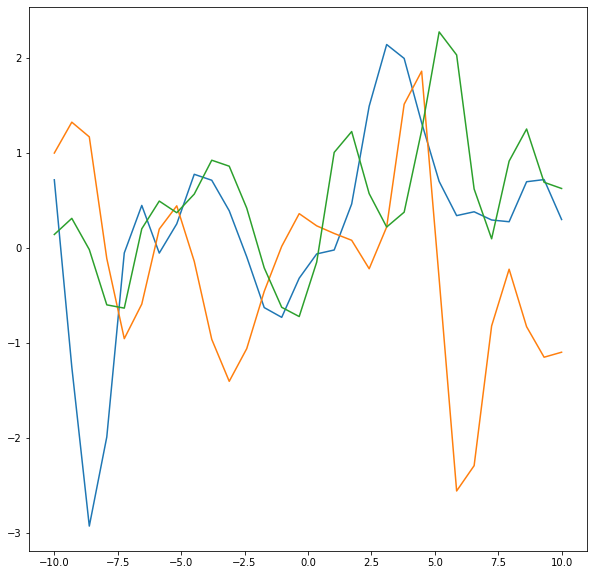

In [ ]:
xs = np.linspace(-10, 10, 30).reshape(-1, 1)
xs_grid = np.meshgrid(xs,xs)
zeros = np.zeros(xs.shape)
mean_vector = np.zeros(len(xs))
covariance_matrix = kern(np.hstack((xs,zeros)))  
MVN_values = np.random.multivariate_normal(mean_vector, covariance_matrix, 3).T
plt.plot(xs, MVN_values)
